In [1]:
import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [3]:
counts = pd.read_csv("C:/RNA_Seq_Analysis/data/count.out", sep="\t")
counts

,Geneid,X2_Ctr_S2,X2_RS_S6,X3_Ctr_S7,X3_RS_S12,X4_Ctr_S13,X4_RS_S16,X5_Ctr_S1,X5_RS_S9
0,ENSG00000142611,0,0,0,0,0,0,0,0
1,ENSG00000284616,0,0,0,0,0,0,0,0
2,ENSG00000157911,0,0,0,0,0,0,0,0
3,ENSG00000260972,0,0,0,0,0,0,0,0
4,ENSG00000224340,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
78681,ENSG00000198695,0,0,0,0,0,0,0,0
78682,ENSG00000210194,0,0,0,0,0,0,0,0
78683,ENSG00000198727,0,0,0,0,0,0,0,0
78684,ENSG00000210195,0,0,0,0,0,0,0,0


In [4]:
counts.set_index('Geneid', inplace=True)
counts.head()

,X2_Ctr_S2,X2_RS_S6,X3_Ctr_S7,X3_RS_S12,X4_Ctr_S13,X4_RS_S16,X5_Ctr_S1,X5_RS_S9
Geneid,,,,,,,,
ENSG00000142611,0,0,0,0,0,0,0,0
ENSG00000284616,0,0,0,0,0,0,0,0
ENSG00000157911,0,0,0,0,0,0,0,0
ENSG00000260972,0,0,0,0,0,0,0,0
ENSG00000224340,0,0,0,0,0,0,0,0


In [5]:
# filter out rows with only 0s
counts = counts[counts.sum(axis=1) > 0]
counts

,X2_Ctr_S2,X2_RS_S6,X3_Ctr_S7,X3_RS_S12,X4_Ctr_S13,X4_RS_S16,X5_Ctr_S1,X5_RS_S9
Geneid,,,,,,,,
ENSG00000099812,5,2,5,0,0,1,2,1
ENSG00000266971,0,0,1,2,1,1,0,0
ENSG00000267792,49,72,23,40,30,19,31,31
ENSG00000116017,350,360,257,154,244,177,180,103
ENSG00000275162,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
ENSG00000310576,8,28,51,42,42,12,20,23
ENSG00000228300,0,0,0,2,0,2,3,0
ENSG00000121410,10,15,12,11,13,6,10,7


In [6]:
counts = counts.T # transpose so we have gene Ids in columns
counts

Geneid,ENSG00000099812,ENSG00000266971,ENSG00000267792,ENSG00000116017,ENSG00000275162,ENSG00000064932,ENSG00000183186,ENSG00000279653,ENSG00000205922,ENSG00000282542,...,ENSG00000275519,ENSG00000105426,ENSG00000296960,ENSG00000274447,ENSG00000295242,ENSG00000310576,ENSG00000228300,ENSG00000121410,ENSG00000301022,ENSG00000267159
X2_Ctr_S2,5,0,49,350,0,1256,1,5,5,9,...,0,2924,1,4,0,8,0,10,0,0
X2_RS_S6,2,0,72,360,0,906,1,2,3,6,...,0,1434,0,3,0,28,0,15,0,1
X3_Ctr_S7,5,1,23,257,0,1144,1,1,4,4,...,0,2023,0,5,0,51,0,12,0,0
X3_RS_S12,0,2,40,154,0,1137,0,2,3,2,...,2,2363,0,3,0,42,2,11,0,0
X4_Ctr_S13,0,1,30,244,1,1220,3,3,4,5,...,0,1693,0,0,0,42,0,13,0,0
X4_RS_S16,1,1,19,177,0,771,1,5,3,4,...,0,2236,0,2,0,12,2,6,0,1
X5_Ctr_S1,2,0,31,180,0,999,0,2,5,4,...,0,1640,0,6,1,20,3,10,1,0
X5_RS_S9,1,0,31,103,0,762,0,7,1,1,...,0,1507,0,1,0,23,0,7,0,0


In [7]:
# creating metadata
metadata = pd.DataFrame(zip(counts.index, ["C", "RS", "C", "RS", "C", "RS", "C", "RS"]), 
             columns = ["Sample", "Condition"])
metadata.set_index("Sample", inplace=True)
metadata

,Condition
Sample,
X2_Ctr_S2,C
X2_RS_S6,RS
X3_Ctr_S7,C
X3_RS_S12,RS
X4_Ctr_S13,C
X4_RS_S16,RS
X5_Ctr_S1,C
X5_RS_S9,RS


##### Differential Expression Analysis

In [8]:
# create dds object
dds = DeseqDataSet(counts=counts,
             metadata=metadata,
             design="~Condition"
             )
dds

AnnData object with n_obs × n_vars = 8 × 2670
    obs: 'Condition'
    obsm: 'design_matrix'

In [9]:
# dds is Anndata object
dds.obs # gets metadata

,Condition
Sample,
X2_Ctr_S2,C
X2_RS_S6,RS
X3_Ctr_S7,C
X3_RS_S12,RS
X4_Ctr_S13,C
X4_RS_S16,RS
X5_Ctr_S1,C
X5_RS_S9,RS


In [ ]:
dds.X # get count data

array([[ 5,  0, 49, ..., 10,  0,  0],
       [ 2,  0, 72, ..., 15,  0,  1],
       [ 5,  1, 23, ..., 12,  0,  0],
       ...,
       [ 1,  1, 19, ...,  6,  0,  1],
       [ 2,  0, 31, ..., 10,  1,  0],
       [ 1,  0, 31, ...,  7,  0,  0]])

In [37]:
dds.var # get gene Ids

""
Geneid
ENSG00000099812
ENSG00000266971
ENSG00000267792
ENSG00000116017
ENSG00000275162
...
ENSG00000310576
ENSG00000228300
ENSG00000121410


In [11]:
# run deseq2 
dds.deseq2()

Fitting size factors...
... done in 0.01 seconds.



Using None as control genes, passed at DeseqDataSet initialization


Fitting dispersions...
... done in 0.40 seconds.

Fitting dispersion trend curve...
... done in 0.11 seconds.

Fitting MAP dispersions...
... done in 0.47 seconds.

Fitting LFCs...
... done in 0.58 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 0 outlier genes.



In [12]:
dds

AnnData object with n_obs × n_vars = 8 × 2670
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [13]:
res_stat = DeseqStats(dds, n_cpus=8, contrast=("Condition", "RS", "C"))

In [14]:
res_stat.summary()

Running Wald tests...


Log2 fold change & Wald test p-value: Condition RS vs C
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Geneid                                                                      
ENSG00000099812    1.838703       -1.131813  1.251454 -0.904398  0.365784   
ENSG00000266971    0.607689        0.942585  2.002970  0.470594  0.637931   
ENSG00000267792   36.577737        0.702140  0.377913  1.857942  0.063177   
ENSG00000116017  216.374437        0.024935  0.279795  0.089118  0.928988   
ENSG00000275162    0.100468       -0.274088  3.869187 -0.070839  0.943526   
...                     ...             ...       ...       ...       ...   
ENSG00000310576   27.979726        0.205852  0.548565  0.375256  0.707470   
ENSG00000228300    0.921539        0.621717  2.089234  0.297581  0.766023   
ENSG00000121410   10.246270        0.205620  0.456596  0.450333  0.652471   
ENSG00000301022    0.125911       -0.274088  3.869187 -0.070839  0.943526   
ENSG00000267159    0

... done in 5.92 seconds.



In [15]:
res = res_stat.results_df # differntially expressed genes (DEGs)
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000099812,1.838703,-1.131813,1.251454,-0.904398,0.365784,NaN
ENSG00000266971,0.607689,0.942585,2.002970,0.470594,0.637931,NaN
ENSG00000267792,36.577737,0.702140,0.377913,1.857942,0.063177,0.324423
ENSG00000116017,216.374437,0.024935,0.279795,0.089118,0.928988,0.978197
ENSG00000275162,0.100468,-0.274088,3.869187,-0.070839,0.943526,NaN
...,...,...,...,...,...,...
ENSG00000310576,27.979726,0.205852,0.548565,0.375256,0.707470,0.891357
ENSG00000228300,0.921539,0.621717,2.089234,0.297581,0.766023,NaN
ENSG00000121410,10.246270,0.205620,0.456596,0.450333,0.652471,0.867798


In [16]:
# map ensembl ENSEMBL Ids to gene symbols
from sanbomics.tools import id_map

get_symbols = id_map(species="human")
get_symbols.mapper

{'ENSG00000210049': 'MT-TF',
 'ENSG00000211459': 'MT-RNR1',
 'ENSG00000210077': 'MT-TV',
 'ENSG00000210082': 'MT-RNR2',
 'ENSG00000209082': 'MT-TL1',
 'ENSG00000198888': 'MT-ND1',
 'ENSG00000210100': 'MT-TI',
 'ENSG00000210107': 'MT-TQ',
 'ENSG00000210112': 'MT-TM',
 'ENSG00000198763': 'MT-ND2',
 'ENSG00000210117': 'MT-TW',
 'ENSG00000210127': 'MT-TA',
 'ENSG00000210135': 'MT-TN',
 'ENSG00000210140': 'MT-TC',
 'ENSG00000210144': 'MT-TY',
 'ENSG00000198804': 'MT-CO1',
 'ENSG00000210151': 'MT-TS1',
 'ENSG00000210154': 'MT-TD',
 'ENSG00000198712': 'MT-CO2',
 'ENSG00000210156': 'MT-TK',
 'ENSG00000228253': 'MT-ATP8',
 'ENSG00000198899': 'MT-ATP6',
 'ENSG00000198938': 'MT-CO3',
 'ENSG00000210164': 'MT-TG',
 'ENSG00000198840': 'MT-ND3',
 'ENSG00000210174': 'MT-TR',
 'ENSG00000212907': 'MT-ND4L',
 'ENSG00000198886': 'MT-ND4',
 'ENSG00000210176': 'MT-TH',
 'ENSG00000210184': 'MT-TS2',
 'ENSG00000210191': 'MT-TL2',
 'ENSG00000198786': 'MT-ND5',
 'ENSG00000198695': 'MT-ND6',
 'ENSG00000210194': 

In [17]:
res['symbol'] = res.index.map(get_symbols.mapper)
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Geneid,,,,,,,
ENSG00000099812,1.838703,-1.131813,1.251454,-0.904398,0.365784,NaN,MISP
ENSG00000266971,0.607689,0.942585,2.002970,0.470594,0.637931,NaN,OR4F8P
ENSG00000267792,36.577737,0.702140,0.377913,1.857942,0.063177,0.324423,WBP1LP11
ENSG00000116017,216.374437,0.024935,0.279795,0.089118,0.928988,0.978197,ARID3A
ENSG00000275162,0.100468,-0.274088,3.869187,-0.070839,0.943526,NaN,AC005391.1
...,...,...,...,...,...,...,...
ENSG00000310576,27.979726,0.205852,0.548565,0.375256,0.707470,0.891357,NaN
ENSG00000228300,0.921539,0.621717,2.089234,0.297581,0.766023,NaN,FAM174C
ENSG00000121410,10.246270,0.205620,0.456596,0.450333,0.652471,0.867798,A1BG


In [23]:
res = res.dropna(subset=['padj', 'symbol'])
res.to_csv("C:/RNA_Seq_Analysis/data/pydeseq_out.csv", index=True)

In [27]:
# find "significant" DEGs

# res = res[res["baseMean"] >= 10] # res = res[res.baseMean >= 10] also correct
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol
Geneid,,,,,,,
ENSG00000126261,1253.787139,-0.504829,0.119767,-4.215093,2.496752e-05,0.001113,UBA2
ENSG00000128011,16.985290,2.023367,0.558500,3.622857,2.913665e-04,0.007654,LRFN1
ENSG00000073050,196.862561,-0.765474,0.169258,-4.522534,6.110358e-06,0.000409,XRCC1
ENSG00000108106,1330.885518,-1.095423,0.184692,-5.931094,3.009236e-09,0.000001,UBE2S
ENSG00000071626,1274.077600,-0.629010,0.117001,-5.376117,7.610930e-08,0.000013,DAZAP1
...,...,...,...,...,...,...,...
ENSG00000087086,11401.749805,1.180493,0.236746,4.986328,6.153765e-07,0.000057,FTL
ENSG00000267100,67.557057,-1.176083,0.297864,-3.948391,7.867837e-05,0.002859,ILF3-DT
ENSG00000204941,133.379735,2.136119,0.414850,5.149135,2.616912e-07,0.000032,PSG5


#### Downstream Analyses

In [ ]:
import scanpy as sc

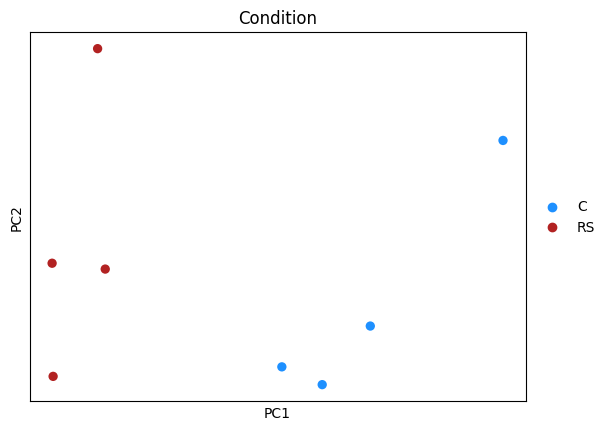

In [52]:
# PCA plot

sc.tl.pca(dds)

sc.pl.pca(
    dds,
    color="Condition",
    size=180,
    palette= {
        "C": "dodgerblue",   # blue
        "RS": "firebrick", # orange
    }
)


In [87]:
import gseapy as gp
from gseapy import gseaplot

In [ ]:
# GSEA 
# use res that is all genes detected 

In [ ]:
ranking = res[["symbol", "stat"]].dropna().sort_values("stat", ascending=False) # desc
ranking

,symbol,stat
Geneid,,
ENSG00000167772,ANGPTL4,6.113847
ENSG00000072071,ADGRL1,5.149209
ENSG00000204941,PSG5,5.149135
ENSG00000087086,FTL,4.986328
ENSG00000160460,SPTBN4,4.938052
...,...,...
ENSG00000071626,DAZAP1,-5.376117
ENSG00000130816,DNMT1,-5.650584
ENSG00000105202,FBL,-5.772333


In [57]:
ranking = ranking.drop_duplicates("symbol")
ranking

,symbol,stat
Geneid,,
ENSG00000167772,ANGPTL4,6.113847
ENSG00000072071,ADGRL1,5.149209
ENSG00000204941,PSG5,5.149135
ENSG00000087086,FTL,4.986328
ENSG00000160460,SPTBN4,4.938052
...,...,...
ENSG00000071626,DAZAP1,-5.376117
ENSG00000130816,DNMT1,-5.650584
ENSG00000105202,FBL,-5.772333


In [82]:
[x for x in gp.get_library_name(organism='Human') if x.startswith("GO")]

['GO_Biological_Process_2021',
 'GO_Biological_Process_2023',
 'GO_Biological_Process_2025',
 'GO_Cellular_Component_2021',
 'GO_Cellular_Component_2023',
 'GO_Cellular_Component_2025',
 'GO_Molecular_Function_2021',
 'GO_Molecular_Function_2023',
 'GO_Molecular_Function_2025']

In [85]:
pre_res = gp.prerank(rnk = ranking, gene_sets = "GO_Biological_Process_2025", 
                     seed = 6, permutation_num = 1000, verbose=True) # increase permutation_num to make analysis accurate

2025-08-16 21:06:57,966 [INFO] Parsing data files for GSEA.............................
2025-08-16 21:06:57,967 [INFO] Enrichr library gene sets already downloaded in: C:\Users\19utk\.cache/gseapy, use local file
2025-08-16 21:06:58,046 [INFO] 5284 gene_sets have been filtered out when max_size=500 and min_size=15
2025-08-16 21:06:58,047 [INFO] 0059 gene_sets used for further statistical testing.....
2025-08-16 21:06:58,047 [INFO] Start to run GSEA...Might take a while..................
2025-08-16 21:06:58,177 [INFO] Congratulations. GSEApy runs successfully................



In [86]:
pre_res.res2d.head(5)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Chromatin Organization (GO:0006325),-0.718059,-2.243217,0.0,0.0,0.0,11/23,8.74%,DNMT1;CHAF1A;ASF1B;TRIM28;RUVBL2;DPF1;PRMT1;SM...
1,prerank,"mRNA Splicing, via Spliceosome (GO:0000398)",-0.724568,-2.151592,0.0,0.0,0.0,12/21,14.57%,HNRNPM;DDX39A;ILF3;HNRNPUL1;SNRPA;U2AF2;XAB2;S...
2,prerank,mRNA Processing (GO:0006397),-0.704659,-2.065999,0.0,0.002355,0.005,11/20,14.57%,HNRNPM;DDX39A;SNRPA;U2AF2;XAB2;SF3A2;PRPF31;PA...
3,prerank,DNA Repair (GO:0006281),-0.672068,-2.002764,0.0,0.004945,0.012,14/20,25.14%,POLD1;XRCC1;TRIM28;PPP5C;DOT1L;PNKP;NOP53;CDKN...
4,prerank,"RNA Splicing, via Transesterification Reaction...",-0.694751,-2.001707,0.0,0.003956,0.012,11/19,18.40%,HNRNPM;DDX39A;SNRPA;U2AF2;XAB2;SF3A2;PRPF31;SN...


[<Axes: xlabel='Gene Rank', ylabel='Ranked metric'>,
 <Axes: >,
 <Axes: >,
 <Axes: ylabel='Enrichment Score'>]

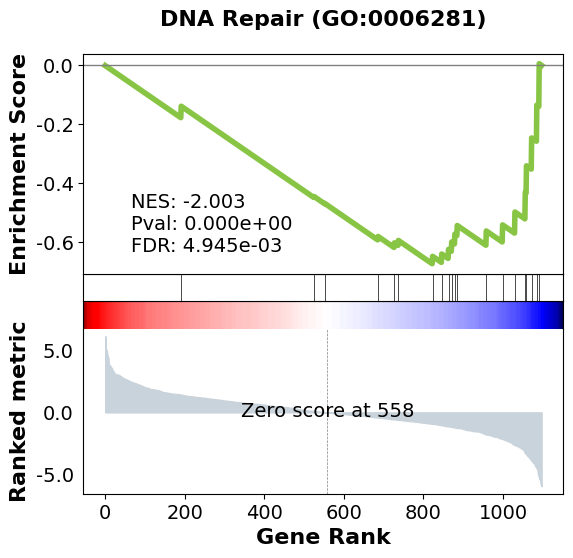

In [91]:
gseaplot(rank_metric=pre_res.ranking, term='DNA Repair (GO:0006281)',
          **pre_res.results['DNA Repair (GO:0006281)'])

In [93]:
[x for x in gp.get_library_name(organism='Human') if x.startswith("KEGG")]

['KEGG_2013',
 'KEGG_2015',
 'KEGG_2016',
 'KEGG_2019_Human',
 'KEGG_2019_Mouse',
 'KEGG_2021_Human']

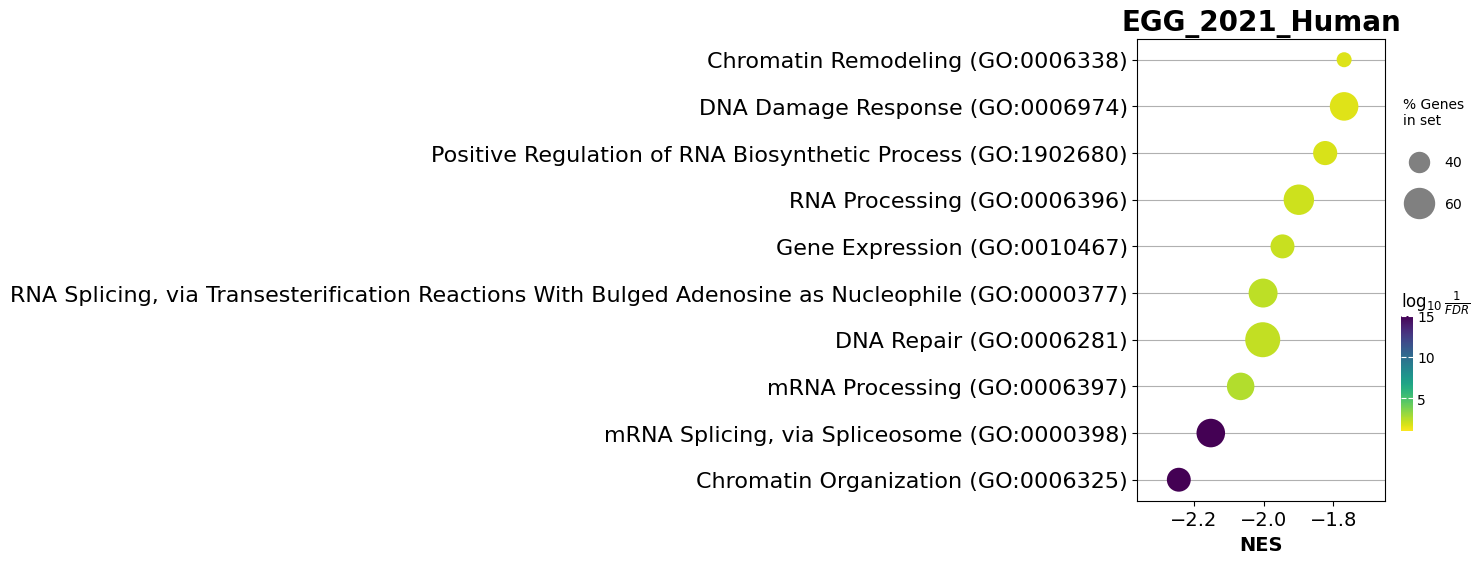

In [94]:
from gseapy import dotplot

ax = dotplot(pre_res.res2d,
             column="FDR q-val",
             title='EGG_2021_Human',
             size=6, # adjust dot size,
             cutoff=0.25, show_ring=False)

In [123]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
dds

AnnData object with n_obs × n_vars = 8 × 2670
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals', 'X_pca'
    varm: 'LFC', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

In [103]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts']) # log1p(x) = log(1+x)

In [106]:
dds

AnnData object with n_obs × n_vars = 8 × 2670
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals', 'X_pca'
    varm: 'LFC', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

In [107]:
# using significant DEGs

dds_sigs = dds[:, sigs.index] # subset dds
dds_sigs

View of AnnData object with n_obs × n_vars = 8 × 74
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals', 'X_pca'
    varm: 'LFC', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

In [ ]:
# we need 
dds.layers['log1p'] # log normalized count values
dds_sigs.var_names # gives gene IDs
dds_sigs.obs_names # sample names

Index(['X2_Ctr_S2', 'X2_RS_S6', 'X3_Ctr_S7', 'X3_RS_S12', 'X4_Ctr_S13',
       'X4_RS_S16', 'X5_Ctr_S1', 'X5_RS_S9'],
      dtype='object', name='Sample')

In [120]:
df = pd.DataFrame(dds_sigs.layers['log1p'].T, index = dds_sigs.var_names, columns = dds_sigs.obs_names)
df.index = df.index.map(get_symbols.mapper)

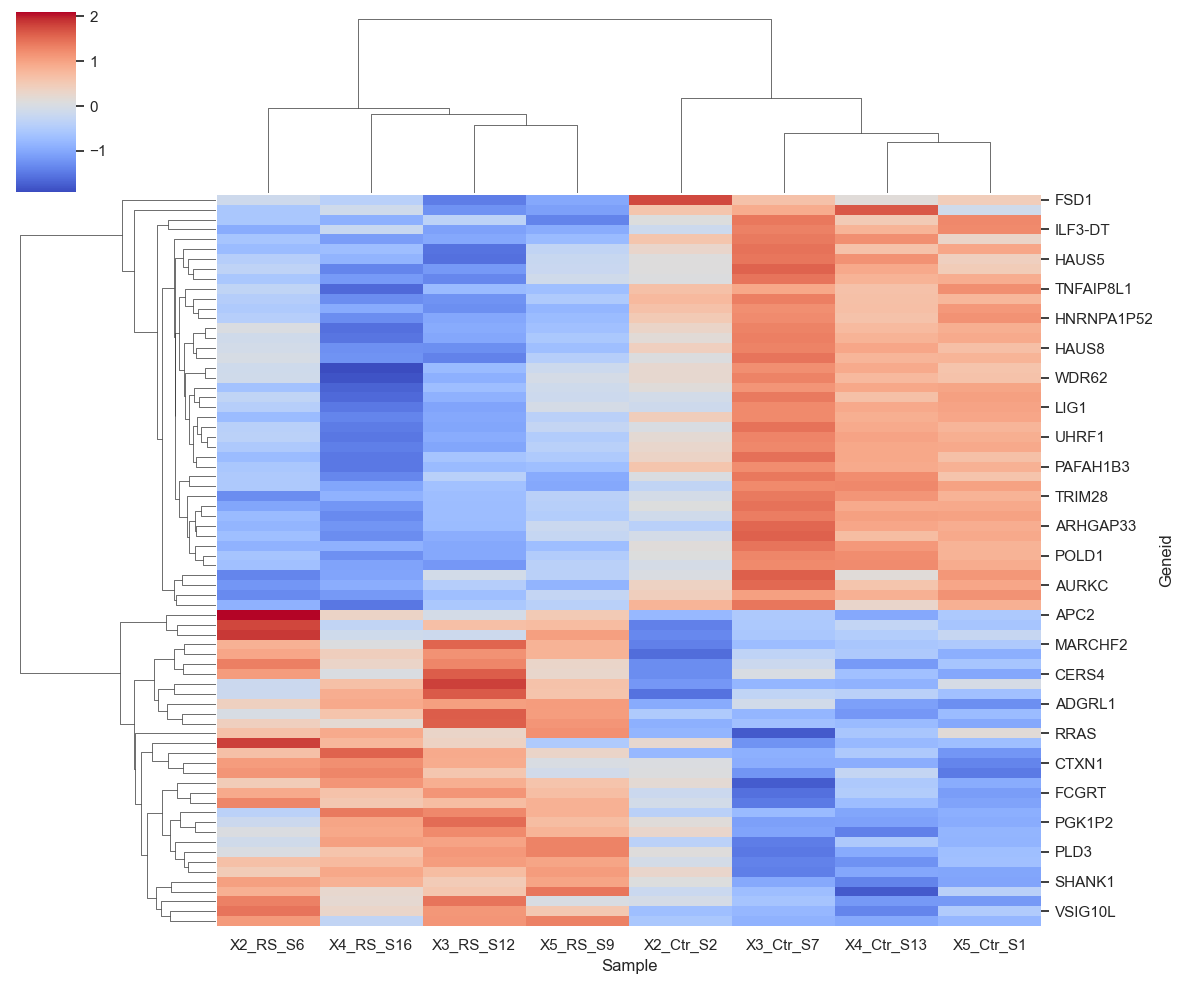

In [135]:
sns.clustermap(
    df,
    z_score=0,  # standardize across rows
    cmap="coolwarm",
    figsize=(12, 10)
)


plt.show()